# June 16, 2019 Reinforcement Learning Basic  
* name: Jikhan Jeong  
* Lecture 4: Q-learning exploit&exploration and discounted reward
* reference: https://hunkim.github.io/ml/  

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr
import sympy

* registor openai environment

In [7]:
register(
    id='FrozenLake-v5',
    entry_point ='gym.envs.toy_text:FrozenLakeEnv',
    kwargs ={'map_name':'4x4',
            'is_slippery':False}  
)


In [8]:
env = gym.make('FrozenLake-v5')

In [9]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

In [13]:
dis =.99
num_episodes = 2000
rList = []

* Q_learning e-greedy and discount factor

In [16]:
for i in range(num_episodes):
    state = env.reset()
    rAll=0
    done = False # elsif
    
    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i+1))
        
        new_state, reward, done,_ = env.step(action)
                
        Q[state,action] = reward + dis*np.max(Q[new_state,:])
        
        rAll += reward # count on the number of success
        state = new_state
        
    rList.append(rAll)

In [17]:
print("Success rate:" + str(sum(rList)/num_episodes)) # success count / total trials =2000

Success rate:0.94


In [19]:
print("Final Q-table Value")
print(Q)

Final Q-table Value
[[0.         0.95099005 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.96059601 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.970299   0.        ]
 [0.         0.9801     0.         0.        ]
 [0.         0.99       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.99       0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


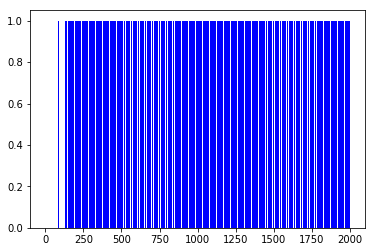

In [20]:
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

# Q-learning with e-greedy
* as iteration size incresing, e term will diminish
* randomness injected by e-greedy in the initial stage so that Q value may be more vary

In [26]:
rlist =[]

In [27]:
for i in range(num_episodes):
    state = env.reset()
    rALL=0
    done = False # elsif
    e= 1./((i//100)+1) # divided by 100, //
    while not done:
        if np.random.rand(1) < e:
            action = env.action_space.sample()
            
        else:
            action = np.argmax(Q[state,:])
        new_state, reward, done,_ = env.step(action)
                
        Q[state,action] = reward + dis*np.max(Q[new_state,:])
        
        rALL += reward # count on the number of success
        state = new_state
        
    rlist.append(rALL)

In [29]:
print("Success rate of Q learning with e-greedy:" + str(sum(rlist)/num_episodes)) # success count / total trials =2000

Success rate of Q learning with e-greedy:0.8075


In [30]:
print("Final Q-table Value of Q-learning with e-greedy")
print(Q)

Final Q-table Value of Q-learning with e-greedy
[[0.94148015 0.95099005 0.95099005 0.94148015]
 [0.94148015 0.         0.96059601 0.95099005]
 [0.95099005 0.970299   0.95099005 0.96059601]
 [0.96059601 0.         0.95099005 0.95099005]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.96059601]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.970299   0.99       0.         0.970299  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


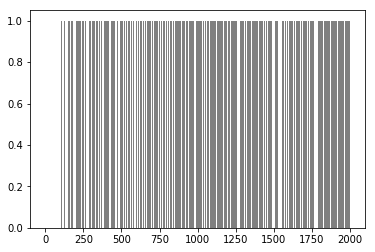

In [31]:
plt.bar(range(len(rlist)), rlist, color="gray")
plt.show()